In [183]:
import pandas as pd

coffee_df = pd.read_csv("coffee.csv")
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [185]:
coffee_df = coffee_df.drop("product_id", axis=1)
coffee_df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/6/2023,20:18:41,2,8,Hell's Kitchen,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/6/2023,20:25:10,2,8,Hell's Kitchen,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/6/2023,20:31:34,1,8,Hell's Kitchen,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/6/2023,20:57:19,1,8,Hell's Kitchen,3.75,Coffee,Barista Espresso,Cappuccino


In [189]:

grouped_coffee = coffee_df.groupby('product_type')


coffee_list = []

for group, content in grouped_coffee:
    coffee_dict = {}

    grp_res = grouped_coffee.get_group(group)

    for index, row in grp_res.iterrows():
        coffee_dict['Category'] = row["product_category"]
        
    coffee_dict['Product'] = group
    coffee_dict['Total Order'] = content.transaction_qty.sum()
    
    coffee_list.append(coffee_dict)


coffee_df = pd.DataFrame(coffee_list)
coffee_df


,Category,Product,Total Order
0,Coffee,Barista Espresso,24943
1,Bakery,Biscotti,5788
2,Loose Tea,Black tea,303
3,Tea,Brewed Black tea,17462
4,Tea,Brewed Chai tea,26250
5,Tea,Brewed Green tea,8697
6,Tea,Brewed herbal tea,17328
7,Loose Tea,Chai tea,443
8,Branded,Clothing,221
9,Packaged Chocolate,Drinking Chocolate,266


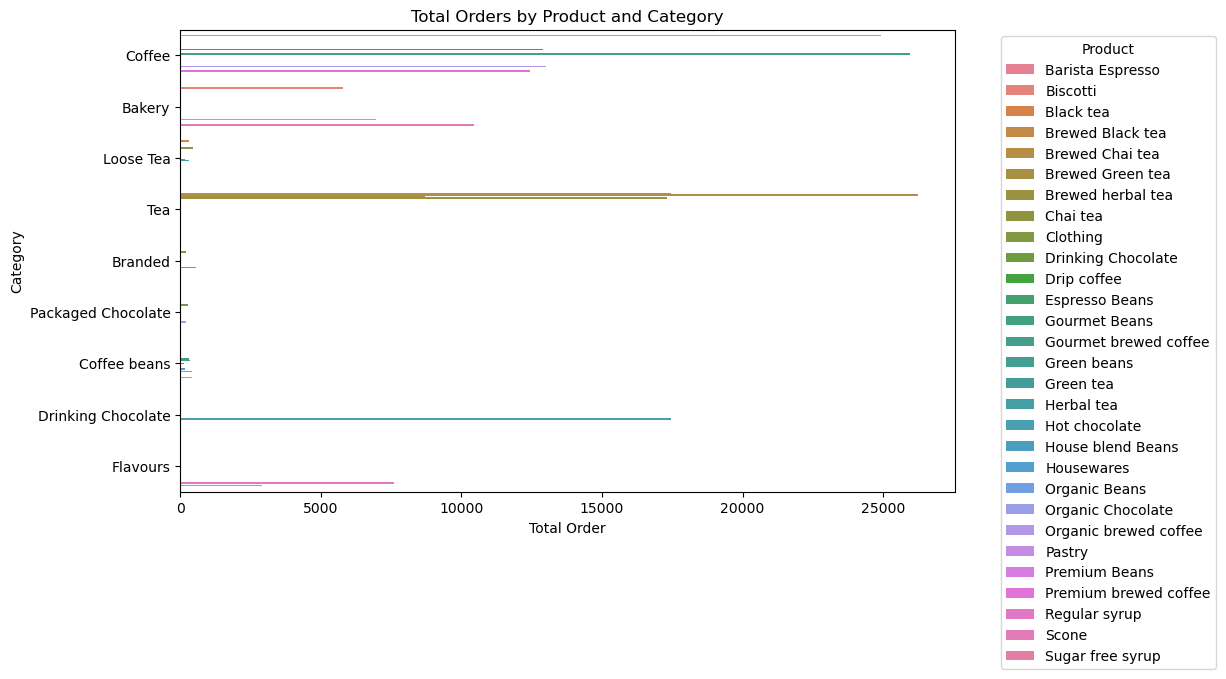

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(10, 6))
sns.barplot(x='Total Order', y='Category', hue='Product', data=coffee_df)
plt.title('Total Orders by Product and Category')
plt.xlabel('Total Order')
plt.ylabel('Category')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()